In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import ttest_1samp

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
import sys
import multiprocessing as mp
import pprint

print(sys.getrecursionlimit())
sys.setrecursionlimit(10001)

print("Number of processors: ", mp.cpu_count())

3000
Number of processors:  12


In [4]:
cd sgemm_product_dataset

C:\Users\abhis\Downloads\New folder\College\Course Materials\Sem 2\Applied Machine Learning\Assignments\Assignment 1\sgemm_product_dataset


In [5]:
data = pd.read_csv("sgemm_product.csv")
print(data.shape)
data.head()

(241600, 18)


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [6]:
data['Runtime'] = data[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].sum(axis = 1)/4

In [9]:
def normalizing(x):
    normalizer = preprocessing.Normalizer()
    x_normalized =pd.DataFrame(scaler.fit_transform(x))
    x_normalized.columns = x.columns
    return x_normalized

In [8]:
data_normalized = normalizing(data)
data_normalized.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Runtime
0,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,-1.0,-1.0,-1.0,-0.277465,-0.275877,-0.268497,-0.275927,-0.274446
1,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,-1.0,-1.0,1.0,-0.378085,-0.377918,-0.375101,-0.375228,-0.376589
2,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,-1.0,1.0,-1.0,-0.373451,-0.371300,-0.371005,-0.370400,-0.371545
3,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,-1.0,1.0,1.0,-0.361311,-0.346319,-0.354757,-0.357895,-0.355077
4,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,-1.0,1.0,-1.0,-1.0,-0.277817,-0.259305,-0.257159,-0.278612,-0.268229


In [10]:
data_normalized['Runtime - logistic'] = np.where(
    data_normalized['Runtime'].median(axis = 0) >= data_normalized['Runtime'], 0, 1)

In [11]:
x_train ,x_test ,y_train , y_test = train_test_split(
    data_normalized.drop(columns = ['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)','Runtime', 'Runtime - logistic']), 
    data_normalized['Runtime - logistic'], test_size=0.3,  random_state=100)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

c:\users\abhis\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Logistic Regression

Defining the model calculation functions

In [12]:
def grad_desc_original(x, xt, length, y, yt, one_minus_yt, m, alpha, iters, costs):
    
    cost = (-1/length) * ( yt @ np.log(sigmoid(x @ m) + sys.float_info.epsilon) +
                           one_minus_yt @ np.log(1 - sigmoid( x @ m) + sys.float_info.epsilon))[0]
    m = m - (alpha/length) * (xt @ (sigmoid(x @ m) - y))
        
    print(iters, cost)
    iters = iters - 1
    costs.append(cost)
    
    if iters == 0:
        return [m, costs]
    else:
        return grad_desc_original(x, xt, length, y, yt, one_minus_yt, m, alpha, iters, costs)
    
# np.random.seed(0)
# x = np.array(x_train)
# xt = x.T
# length = len(x)
# y = np.array(y_train)
# yt = y.T
# one_minus_yt = (1-y).T
# m = np.random.rand(x.shape[1],1)
# alpha = 0.015
# iters = 3500

# grad_desc_original(x, xt, length, y, yt, one_minus_yt, m, alpha, iters, [])

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
def calc_m(m, alpha, x, y, length):
    return m - (alpha/length) * (x.T @ (sigmoid(x @ m) - y))

In [15]:
def calc_cost(m, x, y, length):
    return (-1/length) * ( y.T @ np.log(sigmoid(x @ m) + sys.float_info.epsilon) +
                           ((1-y).T) @ np.log(1 - sigmoid( x @ m) + sys.float_info.epsilon))[0]

In [16]:
def grad_desc(x, y, length, m, alpha, iters, costs):
    costs.append(calc_cost(m, x, y, length)[0])
    m_new = calc_m(m, alpha, x, y, length)
    
    if iters == 0:
        return [m, costs]
    else:
        return grad_desc(x, y, length, m_new, alpha, iters - 1, costs)

In [36]:
def grad_desc(x, y, length, m, alpha, iters, costs, threshold = 0):
    for i in range(0, iters):
        costs.append(calc_cost(m, x, y, length)[0])
        m = calc_m(m, alpha, x, y, length)
        if i > 1 and (costs[len(costs) - 2] - costs[len(costs) - 1] <= threshold):
            print(costs[len(costs) - 2], costs[len(costs) - 1])
            break
    return [m, costs, i]
    

Fitting the model for an initial alpha of 0.015, with 3500 iterations and not checking for any thresholds in the drop of costs

In [40]:
np.random.seed(0)
x = np.array(x_train)
y = np.array(y_train)
m = np.random.rand(x.shape[1],1)
alpha = 0.015
iters = 3500

In [41]:
betas = grad_desc(x, y, len(x), m, alpha, iters, [])

Final cost: 0.4786915679729066



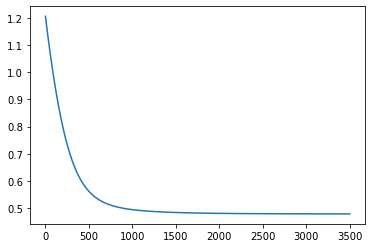

In [42]:
plt.plot(betas[1])
print('Final cost: {}\n'.format(betas[1][len(betas[1]) - 1]))

In [21]:
model_output = pd.DataFrame(columns = ['Variable', 'Coeff'])
for i in range(0, len(betas[0])):
    model_output.loc[i] = [x_train.columns[i], betas[0][i][0]]
print('Model Output:\n')
model_output

# const	0.004167
# MWG	1.263071

Model Output:



,Variable,Coeff
0,const,0.004167
1,MWG,1.263071
2,NWG,0.810708
3,KWG,0.142091
4,MDIMC,-0.853786
5,NDIMC,-0.732831
6,MDIMA,-0.041744
7,NDIMB,-0.063933
8,KWI,-0.019694
9,VWM,-0.057794


In [22]:
logit_model=sm.Logit(y_train,x_train).fit()
logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.478500
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:              Logit              Pseudo R-squared: 0.310      
Dependent Variable: Runtime - logistic AIC:              161877.9255
Date:               2020-02-11 18:39   BIC:              162028.5010
No. Observations:   169120             Log-Likelihood:   -80924.    
Df Model:           14                 LL-Null:          -1.1723e+05
Df Residuals:       169105             LLR p-value:      0.0000     
Converged:          1.0000             Scale:            1.0000     
No. Iterations:     6.0000                                          
----------------------------------------------------------------------
            Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
----------------------------------------------------------------------
const       0.0050     0.0061      0.8125   0.4165   -0.0070    0.0170
MWG         1.3095     0.0079    166.0315   0.0000    1.2940    1.3249
NWG         0.8478     0.0073    115.3554   0.0000    0.8334    0.8622
KWG         0.1534     0.0064     24.0918   0.0000    0.1409    0.1659
MDIMC      -0.8926     0.0075   -119.5945   0.0000   -0.9072   -0.8780
NDIMC      -0.7681     0.0073   -105.6625   0.0000   -0.7824   -0.7539
MDIMA      -0.0463     0.0067     -6.9620   0.0000   -0.0593   -0.0333
NDIMB      -0.0693     0.0066    -10.4263   0.0000   -0.0823   -0.0563
KWI        -0.0203     0.0061     -3.3157   0.0009   -0.0324   -0.0083
VWM        -0.0778     0.0069    -11.2038   0.0000   -0.0914   -0.0642
VWN        -0.1495     0.0069    -21.7170   0.0000   -0.1630   -0.1360
STRM       -0.3226     0.0062    -51.9886   0.0000   -0.3347   -0.3104
STRN       -0.0231     0.0061     -3.7583   0.0002   -0.0351   -0.0110
SA         -0.4054     0.0062    -64.8980   0.0000   -0.4176   -0.3932
SB         -0.0810     0.0061    -13.1984   0.0000   -0.0931   -0.0690
====================================================================

"""

### Predicting Y values for test data

In [48]:
y_hat = np.round(sigmoid(x_test @ betas[0]))
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_hat), columns = ['Pred True', 'Pred False'], index = ['True', 'False'])
print(confusion_matrix.head())
confusion_matrix.iloc[0,0]

       Pred True  Pred False
True       29482        6724
False       7000       29274


29482

## Experiments with truth

### Experiment 1: Experiment with various parameters for linear and logistic regression (e.g. learning rate ∝) and report on your findings as how the error/accuracy varies for train and test sets with varying these parameters. Plot the results. Report the best values of the parameters.

### Experiment 2: Experiment with various thresholds for convergence for linear and logistic regression. Plot error results for train and test sets as a function of threshold and describe how varying the threshold affects error. Pick your best threshold and plot train and test error (in one figure) as a function of number of gradient descent iterations.

In [75]:
def thresholding(x, decimal):
    results = np.where(x[0]%1 > decimal, 1, 0)
    return results

In [82]:
thresholds = np.linspace(0.0, 1.0, num = 100)
conf = pd.DataFrame(columns = ['TP', 'TN', 'FP', 'FN'])
y_train_pred = sigmoid(x_train @ betas[0])

for i in thresholds:
    y_hat_rounded = thresholding(y_train_pred, i)
    confusion_matrix = metrics.confusion_matrix(y_train, y_hat_rounded)
    confusion_matrix = pd.DataFrame(confusion_matrix/ sum(confusion_matrix.ravel()), 
                                    columns = ['Pred True', 'Pred False'], index = ['True', 'False'])
    conf.loc[len(conf)] = [confusion_matrix.iloc[0,0], confusion_matrix.iloc[1,1], confusion_matrix.iloc[1,0], confusion_matrix.iloc[0,1]]

,TP,TN,FP,FN
0,0.000000,0.499793,0.000000,0.500207
1,0.000982,0.498628,0.001165,0.499225
2,0.005328,0.495684,0.004110,0.494879
3,0.012535,0.492088,0.007705,0.487671
4,0.020796,0.488724,0.011069,0.479411
...,...,...,...,...
95,0.500207,0.034165,0.465628,0.000000
96,0.500207,0.019247,0.480546,0.000000
97,0.500207,0.007084,0.492709,0.000000
98,0.500207,0.000118,0.499675,0.000000


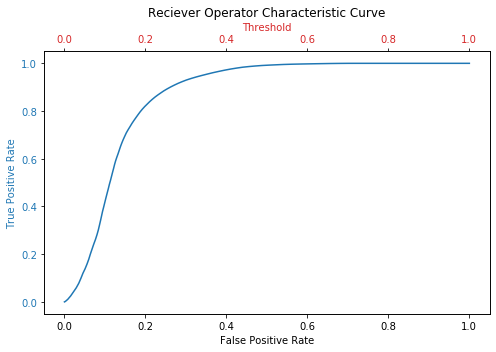

In [105]:
# plt.plot(conf['FP']/(conf['TN'] + conf['FP']), conf['TP']/(conf['TP'] + conf['FN']))

fig, ax1 = plt.subplots(figsize = (7,5))

color = 'tab:blue'
ax1.set_title('Reciever Operator Characteristic Curve')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate', color=color)
ax1.plot(conf['FP']/(conf['TN'] + conf['FP']), conf['TP']/(conf['TP'] + conf['FN']), color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:red'
ax2 = ax1.twiny()
ax2.set_xlabel('Threshold', color=color)
ax2.plot(thresholds, [0]*len(thresholds), color=color, linestyle='None')
ax2.tick_params(axis='x', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Experiment 3: Pick eight features randomly and retrain your models only on these ten features. Compare train and test error results for the case of using your original set of features (14) and eight random features. Report the ten randomly selected features.

### Experiment 4: Now pick eight features that you think are best suited to predict the output, and retrain your models using these ten features. Compare to the case of using your original set of features and to the random features case. Did your choice of features provide better results than picking random features? Why? Did your choice of features provide better results than using all features? Why?